In [4]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# Load data
essay_data = pd.read_csv('data/train.csv')

## Exploratory Analysis

### 1. Overview of the data

In [6]:
essay_data.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate


In [7]:
print(essay_data.info()) # Missing values

print(essay_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36765 entries, 0 to 36764
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   discourse_id             36765 non-null  object
 1   essay_id                 36765 non-null  object
 2   discourse_text           36765 non-null  object
 3   discourse_type           36765 non-null  object
 4   discourse_effectiveness  36765 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB
None
        discourse_id      essay_id  \
count          36765         36765   
unique         36765          4191   
top     0013cc385424  91B1F82B2CF1   
freq               1            23   

                                     discourse_text discourse_type  \
count                                         36765          36765   
unique                                        36691              7   
top     Summer projects should be student-designed        Evidence   
freq 

### 2. Missing values & Duplicates

In [8]:
missing_values = essay_data.isnull().sum()
print(f"Missing values: \n{missing_values} \n")

duplicate_rows = essay_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Missing values: 
discourse_id               0
essay_id                   0
discourse_text             0
discourse_type             0
discourse_effectiveness    0
dtype: int64 

Number of duplicate rows: 0


### 3. Class distribution


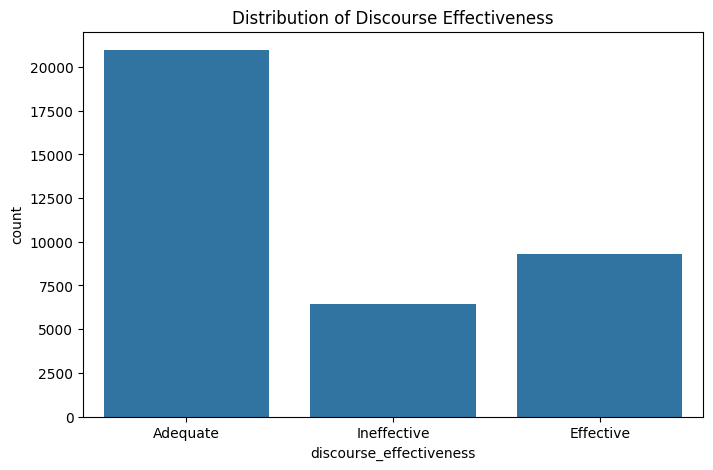

In [9]:
class_distribution = essay_data['discourse_effectiveness'].value_counts()


print(class_distribution.to_frame(name='Class Distribution').style.background_gradient(cmap='Blues'))
plt.figure(figsize=(8,5))
sns.countplot(x='discourse_effectiveness', data=essay_data)
plt.title('Distribution of Discourse Effectiveness')
plt.show()

### 4. Distribution of Discourse Types

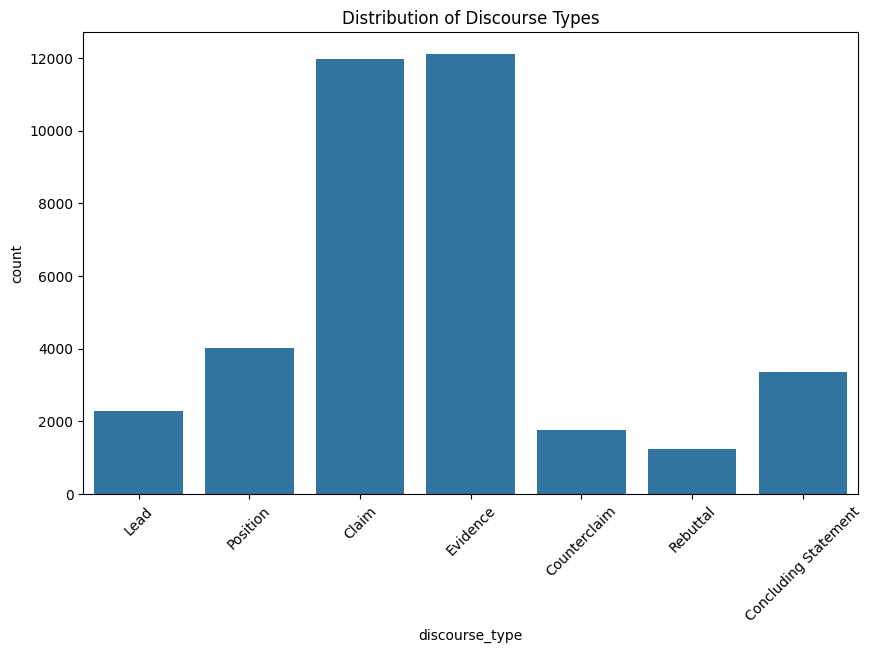

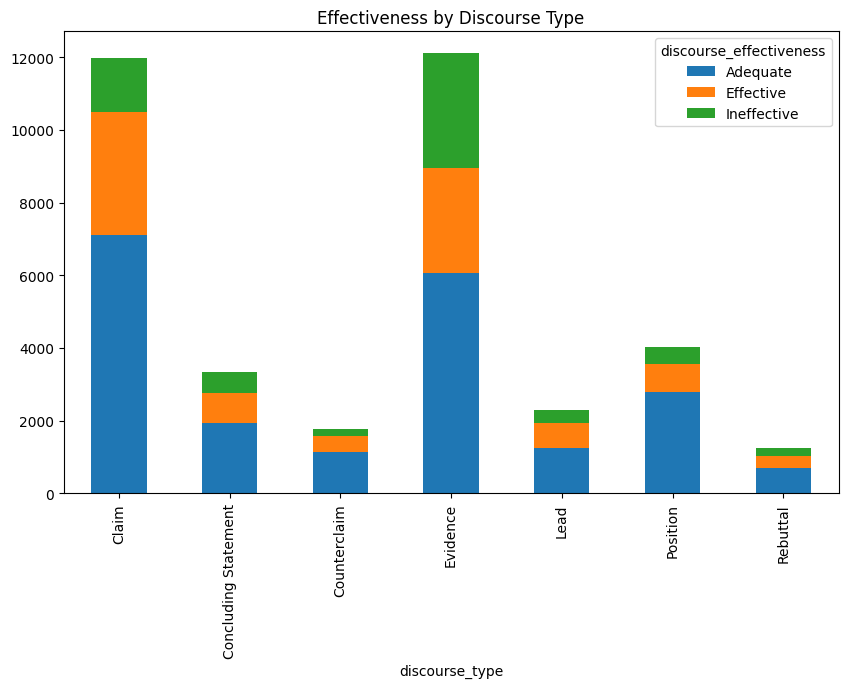

In [10]:
discourse_type_distribution = essay_data['discourse_type'].value_counts()

print(discourse_type_distribution.to_frame(name='Discourse Type Distribution').style.background_gradient(cmap='Greens'))

plt.figure(figsize=(10,6))
sns.countplot(x='discourse_type', data=essay_data)
plt.title('Distribution of Discourse Types')
plt.xticks(rotation=45)
plt.show()

cross_tab = pd.crosstab(essay_data['discourse_type'], essay_data['discourse_effectiveness'])

print(cross_tab.style.background_gradient(cmap='coolwarm'))

cross_tab.plot(kind='bar', stacked=True, figsize=(10,6)) # For each discourse type, the number of essays that are effective and ineffective
plt.title('Effectiveness by Discourse Type')
plt.show()


### 5. Text length analysis

count    36765.000000
mean       249.319652
std        262.652668
min          4.000000
25%         87.000000
50%        155.000000
75%        315.000000
max       4099.000000
Name: text_length, dtype: float64


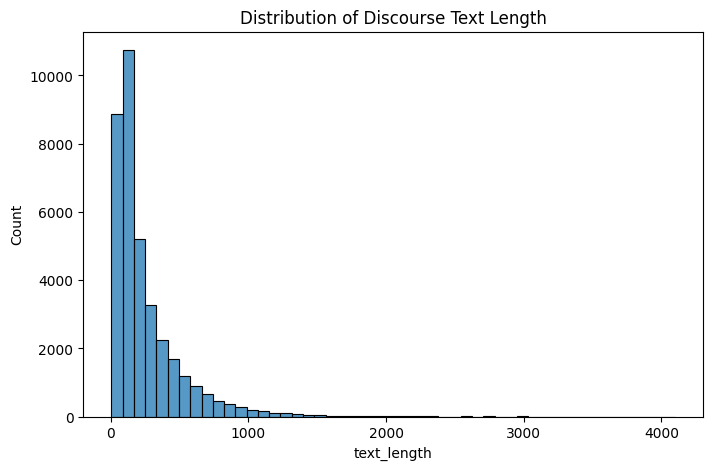

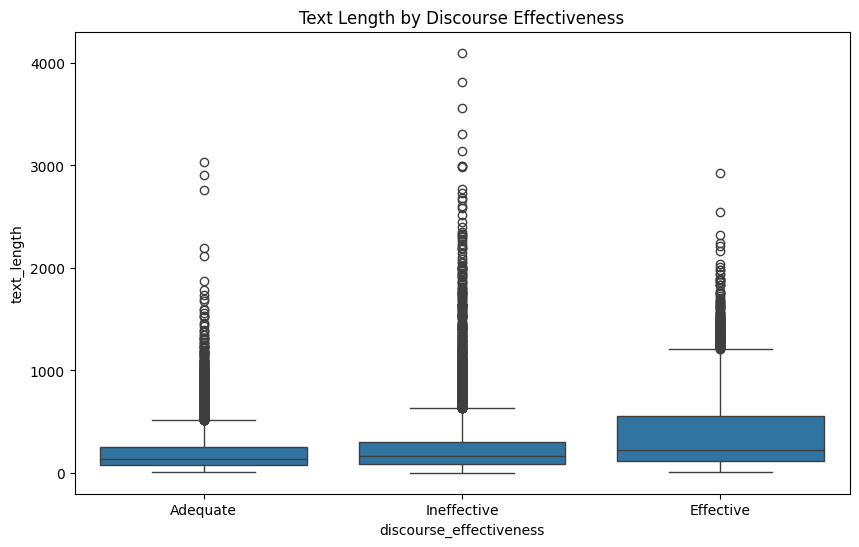

In [11]:
essay_data['text_length'] = essay_data['discourse_text'].apply(len) # New column for text length

text_length_summary = essay_data['text_length'].describe()

print(text_length_summary)

plt.figure(figsize=(8,5))
sns.histplot(essay_data['text_length'], bins=50)
plt.title('Distribution of Discourse Text Length')
plt.show()

# Is there a relationship between text length and discourse effectiveness?
plt.figure(figsize=(10,6))
sns.boxplot(x='discourse_effectiveness', y='text_length', data=essay_data)
plt.title('Text Length by Discourse Effectiveness')
plt.show()


### 6. Unique Essays and Discourse Elements

Number of unique essays: 4191
count    4191.000000
mean        8.772369
std         3.492605
min         1.000000
25%         7.000000
50%         9.000000
75%        11.000000
max        23.000000
Name: discourse_id, dtype: float64


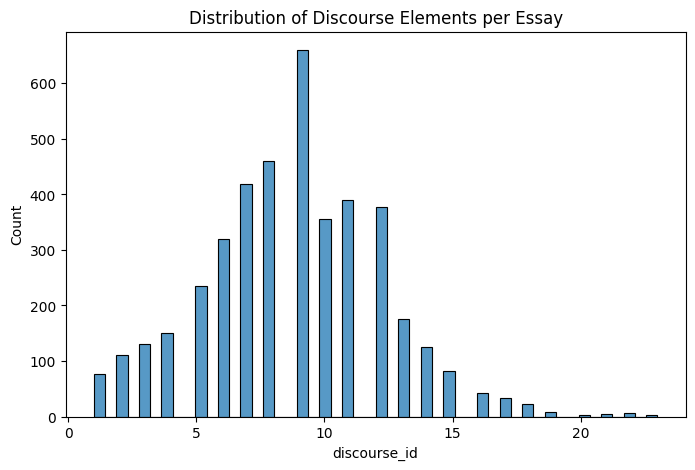

In [12]:
unique_essays = essay_data['essay_id'].nunique()
print(f"Number of unique essays: {unique_essays}")

discourse_per_essay = essay_data.groupby('essay_id')['discourse_id'].count()

print(discourse_per_essay.describe())

#  Distribution of Discourse Elements per Essay
plt.figure(figsize=(8,5))
sns.histplot(discourse_per_essay, bins=50)
plt.title('Distribution of Discourse Elements per Essay')
plt.show()


### 7. Word Cloud

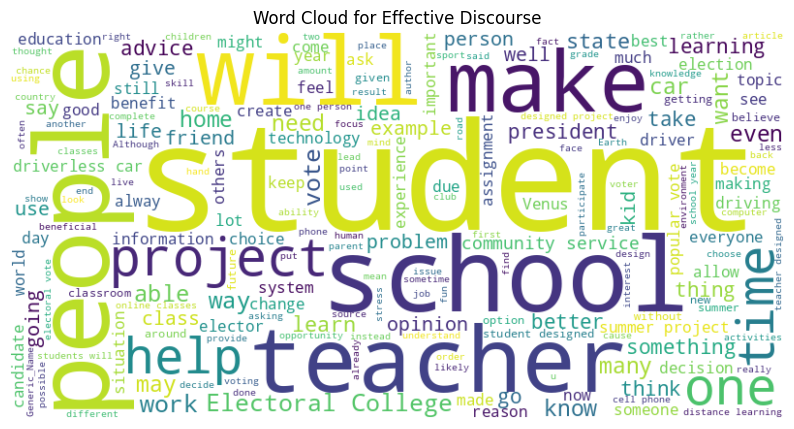

In [13]:
from wordcloud import WordCloud

effective_text = " ".join(essay_data[essay_data['discourse_effectiveness'] == 'Effective']['discourse_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(effective_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Effective Discourse')
plt.show()


## Preprocessing

In [20]:
# Using NLTK to preprocess the text data
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /Users/adrian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/adrian/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adrian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
data = essay_data.copy()

### Text processing

In [21]:
def preprocess_text(text):
    # 1. Lowercase the text
    text = text.lower()
    
    # 2. Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 3. Tokenize the text (split into words)
    tokens = word_tokenize(text)
    
    # 4. Remove stopwords (common words like 'the', 'is')
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # 5. Remove punctuation
    tokens = [word for word in tokens if word not in punctuation]
    
    # 6. Join tokens back into a string
    processed_text = ' '.join(tokens)
    
    return processed_text


data['text'] = data['discourse_text'].apply(preprocess_text)

data.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,text_length,text
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,317,hi im isaac im going writing face mars natural...
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,210,perspective think face natural landform dont t...
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,105,think face natural landform life mars descover...
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,362,life mars would know reason think natural land...
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,101,people thought face formed alieans thought lif...
